<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Import-Packages-&amp;-Data" data-toc-modified-id="Import-Packages-&amp;-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Packages &amp; Data</a></span></li><li><span><a href="#Clean-&amp;-Explore-Data" data-toc-modified-id="Clean-&amp;-Explore-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean &amp; Explore Data</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Warehouse" data-toc-modified-id="Warehouse-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Warehouse</a></span><ul class="toc-item"><li><span><a href="#Value-Counts" data-toc-modified-id="Value-Counts-4.0.1.1"><span class="toc-item-num">4.0.1.1&nbsp;&nbsp;</span>Value Counts</a></span></li><li><span><a href="#Product-Demand" data-toc-modified-id="Product-Demand-4.0.1.2"><span class="toc-item-num">4.0.1.2&nbsp;&nbsp;</span>Product Demand</a></span></li></ul></li><li><span><a href="#Products" data-toc-modified-id="Products-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Products</a></span><ul class="toc-item"><li><span><a href="#Product-Count" data-toc-modified-id="Product-Count-4.0.2.1"><span class="toc-item-num">4.0.2.1&nbsp;&nbsp;</span>Product Count</a></span></li><li><span><a href="#Product-Demand" data-toc-modified-id="Product-Demand-4.0.2.2"><span class="toc-item-num">4.0.2.2&nbsp;&nbsp;</span>Product Demand</a></span></li><li><span><a href="#Top-100-Products" data-toc-modified-id="Top-100-Products-4.0.2.3"><span class="toc-item-num">4.0.2.3&nbsp;&nbsp;</span>Top 100 Products</a></span></li><li><span><a href="#Top-50-Products" data-toc-modified-id="Top-50-Products-4.0.2.4"><span class="toc-item-num">4.0.2.4&nbsp;&nbsp;</span>Top 50 Products</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-4.0.2.5"><span class="toc-item-num">4.0.2.5&nbsp;&nbsp;</span>Discussion</a></span></li><li><span><a href="#Low-Demand-Preview" data-toc-modified-id="Low-Demand-Preview-4.0.2.6"><span class="toc-item-num">4.0.2.6&nbsp;&nbsp;</span>Low Demand Preview</a></span></li><li><span><a href="#Top-Product" data-toc-modified-id="Top-Product-4.0.2.7"><span class="toc-item-num">4.0.2.7&nbsp;&nbsp;</span>Top Product</a></span></li></ul></li><li><span><a href="#Product-Category" data-toc-modified-id="Product-Category-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Product Category</a></span></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Build-&amp;-Fit-Baseline-Model" data-toc-modified-id="Build-&amp;-Fit-Baseline-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Build &amp; Fit Baseline Model</a></span><ul class="toc-item"><li><span><a href="#Top-Product" data-toc-modified-id="Top-Product-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Top Product</a></span><ul class="toc-item"><li><span><a href="#Daily-Trend-Forecasting" data-toc-modified-id="Daily-Trend-Forecasting-5.1.1.1"><span class="toc-item-num">5.1.1.1&nbsp;&nbsp;</span>Daily Trend Forecasting</a></span></li></ul></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Discussion</a></span><ul class="toc-item"><li><span><a href="#Monthly-Trend-Forecasting" data-toc-modified-id="Monthly-Trend-Forecasting-5.1.2.1"><span class="toc-item-num">5.1.2.1&nbsp;&nbsp;</span>Monthly Trend Forecasting</a></span></li><li><span><a href="#Weekly-Trend-Forecasting" data-toc-modified-id="Weekly-Trend-Forecasting-5.1.2.2"><span class="toc-item-num">5.1.2.2&nbsp;&nbsp;</span>Weekly Trend Forecasting</a></span></li></ul></li></ul></li><li><span><a href="#Performance-Metrics" data-toc-modified-id="Performance-Metrics-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Performance Metrics</a></span><ul class="toc-item"><li><span><a href="#Crossvalidation" data-toc-modified-id="Crossvalidation-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Crossvalidation</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li></ul></li><li><span><a href="#Forecasting-&amp;-Predictions" data-toc-modified-id="Forecasting-&amp;-Predictions-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Forecasting &amp; Predictions</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Discussion</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Future-Work" data-toc-modified-id="Future-Work-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Future Work</a></span></li></ul></li></ul></div>

# Intro

# Import Packages & Data

In [1]:
# Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from fbprophet import Prophet
import datetime

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

# Formatting for plots
font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 22}
plt.rc('font', **font)

In [2]:
# Import Data

data = pd.read_csv('Historical_Product_Demand.csv')
df = pd.DataFrame(data)

In [3]:
# Preview Data

df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


# Clean & Explore Data

Since we're fitting time series models, we're going to want to change the Date column to be in datetime format and set it as the index. We'll explore a bit first before getting to that. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 5 columns):
Product_Code        999999 non-null object
Warehouse           999999 non-null object
Product_Category    999999 non-null object
Date                988760 non-null object
Order_Demand        999999 non-null int64
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


We can see the 'Date' column has fewer values than the rest of the columns, which indicates missing data. It doesn't look like much of the data are missing, so if they're indeed null, then we can go ahead and drop those rows.

We can also see that basically every category other than 'Order_Demand' are objects. That's totally fine as we will use them to categorize, however our time series will simply be date and demand.

Let's take a look at our summary statistics for order demand.

In [5]:
# Summary statistics
df.describe().round()

,Order_Demand
count,999999.0
mean,5071.0
std,29603.0
min,-999000.0
25%,20.0
50%,300.0
75%,2000.0
max,4000000.0


With a minimum of -999000.0, it looks like this may be a null value, so we can search for those nulls as well.

Let's go ahead and get those rows with null date values removed, and then change our date column into datetime format and rather than set to index actually, we will set it to Facebook Profit's special 'ds' column.

In [6]:
df[df.Order_Demand == -999000]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
585144,Product_1241,Whse_J,Category_019,2014/3/27,-999000


In [7]:
df.isnull().any()

Product_Code        False
Warehouse           False
Product_Category    False
Date                 True
Order_Demand        False
dtype: bool

In [8]:
df[df.Date.isnull() == True]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
45460,Product_1461,Whse_A,Category_019,NaN,10000
456373,Product_1636,Whse_A,Category_019,NaN,100
456374,Product_1461,Whse_A,Category_019,NaN,300
456375,Product_1464,Whse_A,Category_019,NaN,300
456376,Product_1388,Whse_A,Category_019,NaN,200
...,...,...,...,...,...
995790,Product_1464,Whse_A,Category_019,NaN,-900
995791,Product_1541,Whse_A,Category_019,NaN,-200
995792,Product_1388,Whse_A,Category_019,NaN,-300
995793,Product_1541,Whse_A,Category_019,NaN,-300


This looks like a lot of rows, and that they're all from Warehouse A. Some of them appear to have negative demand as well. Let's take a closer look. 

In [9]:
whse_a = df[df.Warehouse == 'Whse_A']
whse_a

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
34593,Product_0905,Whse_A,Category_023,2012/3/7,50
41029,Product_0097,Whse_A,Category_019,2012/1/18,6000
41030,Product_1496,Whse_A,Category_019,2012/3/13,5000
41031,Product_0097,Whse_A,Category_019,2012/4/16,6000
41032,Product_0097,Whse_A,Category_019,2012/9/24,3900
...,...,...,...,...,...
995797,Product_1822,Whse_A,Category_018,2016/3/1,2
995798,Product_1470,Whse_A,Category_019,2016/5/19,100
995799,Product_0599,Whse_A,Category_017,2016/9/15,12
995800,Product_0599,Whse_A,Category_017,2016/10/26,10


We can see that 11240/153574 of the values are null. There's really no other way to interpolate time data for a warehouse with a NaN value for date, so we're going to remove it. 

We can also check to see how many rows we have for the other warehouses for comparison. 

In [10]:
df.Warehouse.value_counts()

Whse_J    715944
Whse_A    153574
Whse_S     88127
Whse_C     42354
Name: Warehouse, dtype: int64

We can see that Warehouse A is the second largest warehouse. There is a decent amount of variance among the warehouses, so it doesn't seem to be much of an issue to remove the rows.

Let's drop the null values.

In [11]:
# Drop rows with NaN values (which were only in Date column)
df = df.dropna()

In [12]:
# Get index of row with large negative order demand 
df[df.Order_Demand == -999000]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
585144,Product_1241,Whse_J,Category_019,2014/3/27,-999000


In [13]:
# Drop row 
df = df.drop(index=585144)

Now we'll set the Date column to datetime format.

In [14]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988759 entries, 0 to 999998
Data columns (total 5 columns):
Product_Code        988759 non-null object
Warehouse           988759 non-null object
Product_Category    988759 non-null object
Date                988759 non-null datetime64[ns]
Order_Demand        988759 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 45.3+ MB


Great! Now our Date column is set to datetime format so we can subset our data as needed and create time series from it. Now, to the visual exploration (EDA)!

# EDA 

Let's take a look at product demand for the entire time series. Note: I zoomed in on the x-axis as 2011 data was significantly lower. We'll take a closer look at 2011 following this plot.

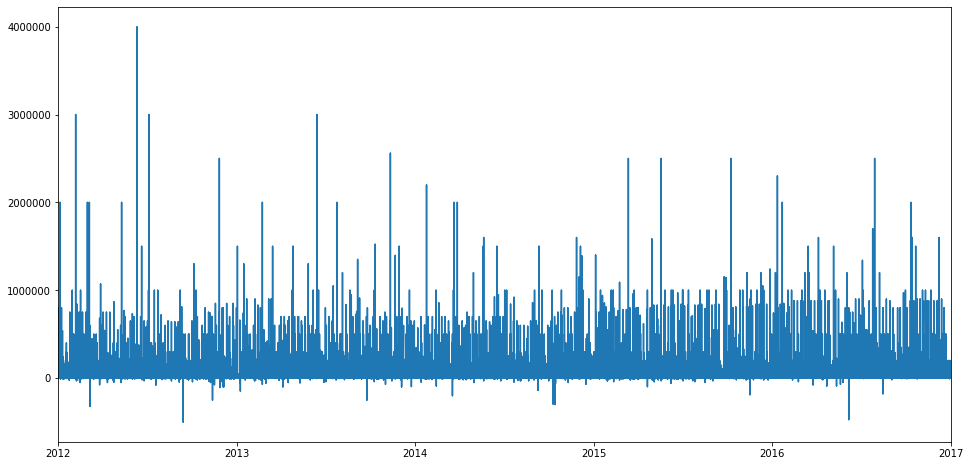

In [15]:
# Plot demand data for entire dataset

# Sort by date first for plotting
df = df.sort_values('Date')

# Set x & y
x = df.Date
y = df.Order_Demand

# Plot
plt.figure(figsize=(16,8))
plt.plot(x, y)

# Set x-axis limits (low demand data for 2011 - may be able to remove this year)
plt.xlim([datetime.date(2012, 1, 1), datetime.date(2017, 1, 1)]);

We can see a really big spike mid 2012. I wonder why? Perhaps there was a promotion or a new product launch or something similar? The demand seems pretty consistent through out the years with a slight drop in Q3 of 2014. 

Let's get a closer look at 2011 (not pictured here as I intentionally zoomed in on the axis for a better visual of the data). 

In [16]:
# Create a time series

# Set index to datetime column 
ts_df = df.set_index('Date')

# Select extra columns to drop (everything except 'Order_Demand')
to_drop = ['Product_Code','Warehouse','Product_Category']
# Drop columns
ts = ts_df.drop(to_drop, axis=1)

In [17]:
# Groupby year
ts_yr = ts.groupby(by=ts.index.year).sum()
ts_yr

,Order_Demand
Date,
2011,7509986
2012,941742907
2013,1009218798
2014,1065271479
2015,1095426177
2016,952219589
2017,294701


We can see that  2011 and 2017 are significantly lower. Let's find out why. First, we'll make a visual. 

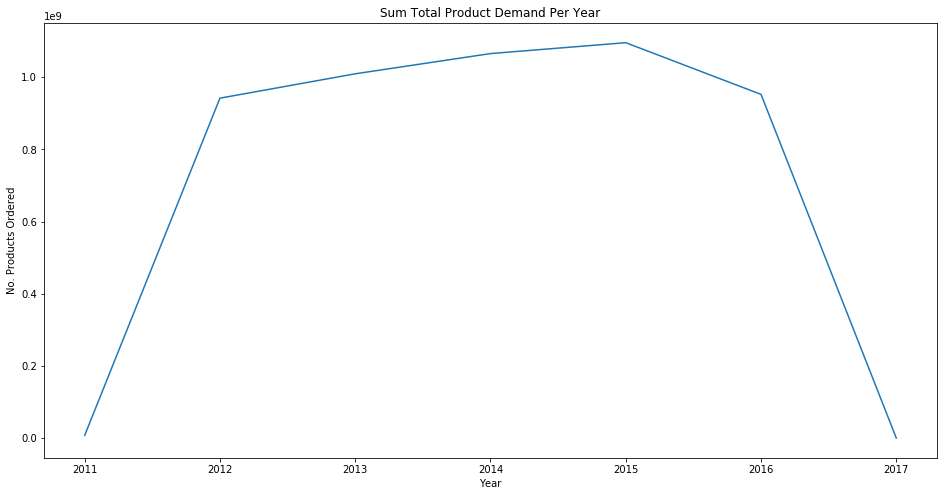

In [18]:
# Plot total product demand vs. year

# Set figure size
plt.figure(figsize=(16,8))
# Plot
plt.plot(ts_yr.index, ts_yr.Order_Demand)
# Title, x & y axis labels
plt.title('Sum Total Product Demand Per Year')
plt.ylabel('No. Products Ordered')
plt.xlabel('Year')
plt.show()

We again can see that demand was significantly lower in 2011 and 2017. I imagine these are either incomplete years or that 2011 was just the beginning, so it took time to gain momentum or perhaps not all of the warehouses were open yet. 

Let's take a closer look to be sure.

In [19]:
# Index time series by year 2011
ts['2011']

,Order_Demand
Date,
2011-01-08,2
2011-05-31,108
2011-06-24,7000
2011-06-24,85000
2011-09-02,1250
...,...
2011-12-30,1000
2011-12-30,4
2011-12-30,1000


We can see that for 2011 we do have all dates/the entire year present. This may indicate the beginning/when the warehouse(s) were brand new or just starting out. Now let's take a look at 2017.

In [20]:
# Index time series by year 2017
ts['2017']

,Order_Demand
Date,
2017-01-02,70
2017-01-03,200
2017-01-03,2000
2017-01-03,200
2017-01-04,10000
2017-01-04,1000
2017-01-04,3000
2017-01-04,1000
2017-01-04,1000


We can see that for this year the data only go through to January 9th, so this is an incomplete year. 

For the sake of our modeling, we will remove 2011 from the data. Again let's visualize that here.

In [21]:
ts_yr

,Order_Demand
Date,
2011,7509986
2012,941742907
2013,1009218798
2014,1065271479
2015,1095426177
2016,952219589
2017,294701


We can see that for those years with data for every day, which are years 2012-2016, the order demand is pretty consistent, with 2012 and 2016 being only slightly lower, and 2017 representing only 9 days of the year. 

So let's go ahead and drop 2011 from our dataset. Since we end up using monthly grouping as we get into modeling, I'm going to remove 2017 as well as it only has data for the first 9 days.

In [22]:
# Slice 2012 - 2016
ts_df = ts_df['2012':'2016']
# Preview
display(ts_df.head())
display(ts_df.tail())

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-01,Product_2166,Whse_S,Category_024,2
2012-01-02,Product_0664,Whse_S,Category_011,20
2012-01-02,Product_1431,Whse_S,Category_019,20000
2012-01-02,Product_1631,Whse_S,Category_019,1000
2012-01-02,Product_1567,Whse_S,Category_019,68000


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2016-12-30,Product_1513,Whse_A,Category_019,100
2016-12-30,Product_1431,Whse_S,Category_019,15000
2016-12-30,Product_1263,Whse_S,Category_019,15000
2016-12-30,Product_1419,Whse_A,Category_019,2300
2016-12-30,Product_1416,Whse_A,Category_019,23000


Looks great! Now we can get to building our baseline model and predicting overall demand. This should be pretty easy to do as we can already see there seems to be an overall consistent amount of demand year over year with all warehouses combined.

As we move further along we can group by warehouse, and depending how many products there are, we can group by product as well. We already know which warehouses are most productive, as we saw early on when we were cleaning and exploring our data.

Let's go ahead and take a look again.

### Warehouse

#### Value Counts

In [23]:
ts_df.Warehouse.value_counts()

Whse_J    715714
Whse_A    142197
Whse_S     87951
Whse_C     42207
Name: Warehouse, dtype: int64

We can see warehouse J has the most orders, not necessarily demand, as demand includes the amount in each order, however we can see warehouse J seems to be the highest volume producing warehouse. 

It could be larger in size, serve a larger region and/or have been established as the first or main warehouse (earlier on). 

In [24]:
whse_j = ts_df[ts_df.Warehouse == 'Whse_J']
whse_j

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-04,Product_1056,Whse_J,Category_032,120
2012-01-05,Product_0197,Whse_J,Category_007,100
2012-01-05,Product_0299,Whse_J,Category_015,12
2012-01-05,Product_1359,Whse_J,Category_019,5000
2012-01-05,Product_0943,Whse_J,Category_005,1000
...,...,...,...,...
2016-12-29,Product_1661,Whse_J,Category_026,12
2016-12-29,Product_0088,Whse_J,Category_019,300
2016-12-29,Product_0956,Whse_J,Category_028,5


#### Product Demand

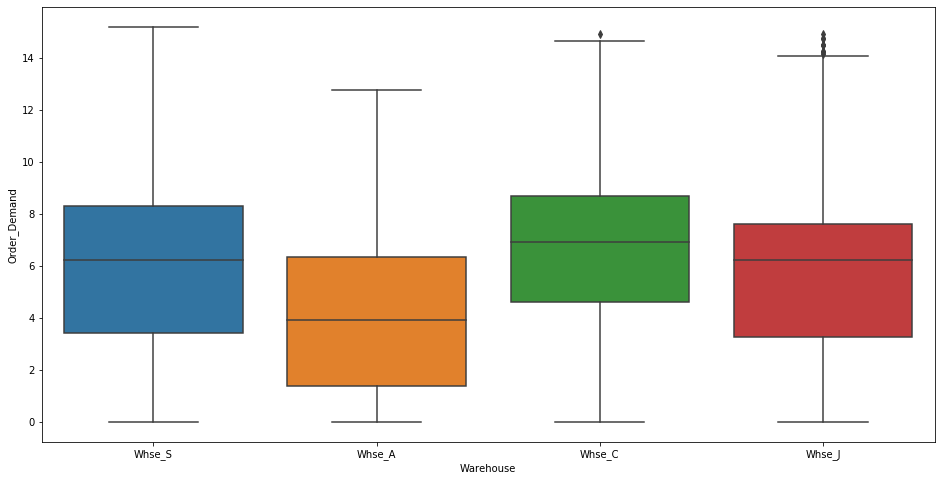

In [25]:
# Set figure size
plt.figure(figsize=(16,8))
# Box plot
sns.boxplot(ts_df['Warehouse'], np.log1p(ts_df['Order_Demand']))
plt.show()

We can see the order here of the most productive warehouses, with J and A in the lead. J by a landslide. S and C being much lower in production. Possibly smaller and servicing more satelite regions. 

Let's take a look at the same, but for products. 

### Products

#### Product Count

Let's see how many products there are in total.

In [26]:
print(f"There are {len(ts_df.Product_Code.unique())} products")

There are 2157 products


Let's take a look at the demand now.

#### Product Demand

We're going to sum lifetime product demand by product code and then preview it before visualizing. 

In [27]:
# Group by product code
prod_sum_demand = ts_df.groupby(by=["Product_Code"]).sum()
# Sort descending 
prod_sum_demand = prod_sum_demand.sort_values(by='Order_Demand', ascending=False)
# Take a look at the top 20
print("Top 20 Products:")
display(prod_sum_demand[0:20])

Top 20 Products:


,Order_Demand
Product_Code,
Product_1359,469665000
Product_1248,287829000
Product_0083,210303000
Product_1341,166411000
Product_1295,121852300
Product_1241,115850000
Product_1245,102037000
Product_1286,101241700
Product_1432,96773000


The top products appear to start out pretty high, possibly exponential and then taper out to a slower more linear decrease. 

Let's go ahead and plot the top 100 products so we can observe the trend visually. 

#### Top 100 Products

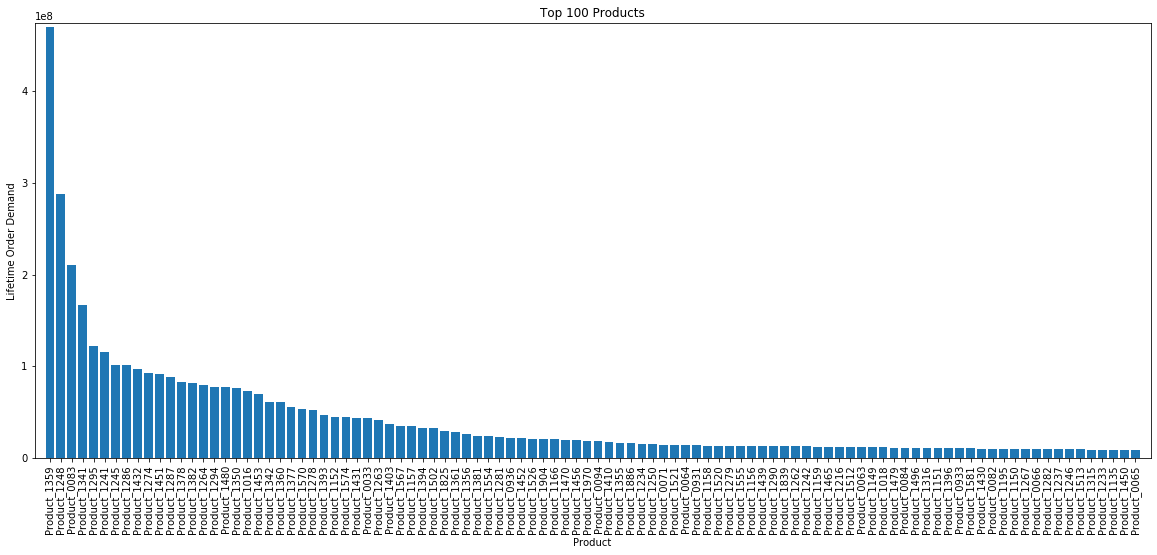

In [28]:
# x-labels
labels = prod_sum_demand.index[0:100]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:100]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90)
plt.title('Top 100 Products')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

We can see how much the demand for products tapers off. Considering this plot shows lifetime demand as well as only the top 100 out of over 2000, there may be many products with demand lower than what would justify stocking or keeping the product on the floor. 

Let's take a closer look at that.

In [29]:
# Print 10 lowest demand products
prod_sum_demand.tail(10)

,Order_Demand
Product_Code,
Product_0638,22
Product_0633,21
Product_0244,20
Product_0647,19
Product_1863,18
Product_0466,15
Product_2151,5
Product_0465,3
Product_1703,2


The manufacturer could most likely save costs by freeing up floor space with the elimination of lower demand products. This would make space for more in demand products and perhaps new products. Or perhaps even downsizing of the facility and staff to only optimize for top producing products.

While this isn't the main focus of this study, I will include it as a recommendation in the future work section. 

#### Top 50 Products

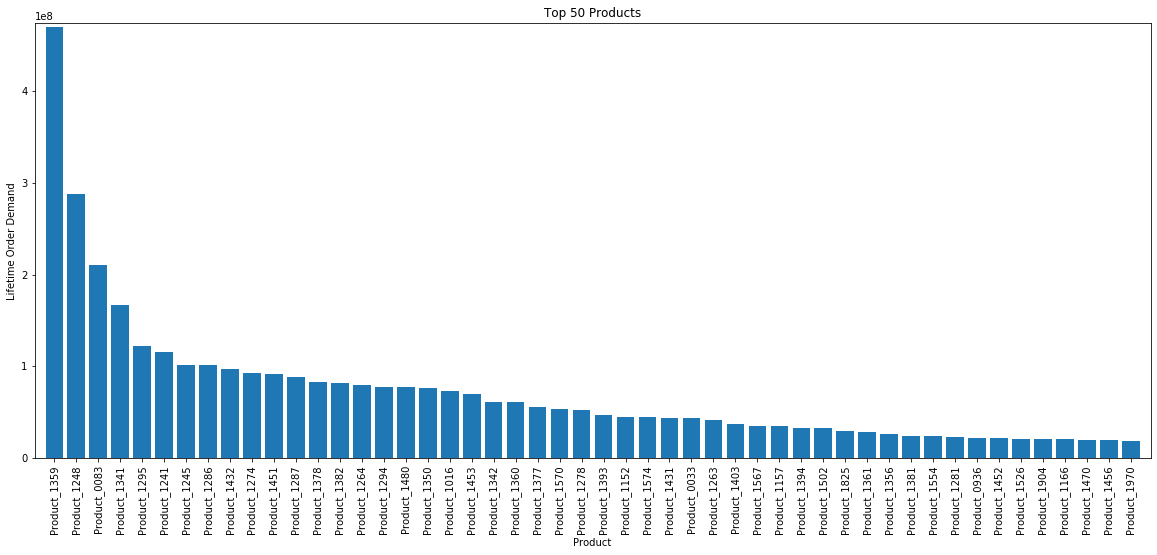

In [30]:
# x-labels
labels = prod_sum_demand.index[0:50]
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = prod_sum_demand.Order_Demand[0:50]

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Prevent extra whitespace 
plt.margins(0.01)
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90)
plt.title('Top 50 Products')
plt.ylabel('Lifetime Order Demand')
plt.xlabel('Product')
plt.show()

#### Discussion

**Low Demand Inventory**

We could see in this section visually that a small percentage of available products make up a very large proportion of orders. If we had more detailed information such as profits from each product, we could do a more detailed analysis here to make suggestions on which products to cut from which warehouses.

In an even more detailed analysis it would be good to know footprint of the warehouse as well as number of employees and cost of employees so we could see where things could be culled down and streamlined. How much money can be saved and profits increased. 

If warehouses were to focus on fewer products which make up the greatest amount of orders/profit, could they then hold more stock of the most popular product and increase demand in other ways, such as advertising and saving money on larger purchase orders/more stock/inventory held? 

As this analysis is focused on predicting demand, we will focus on that for now, but will mention the above in future work.

**Top Demand Inventory**

For now let's focus on first modeling and predicting demand for the top most ordered product, and then the model or model-building process can be applied to other products.

Since a warehouse is most likely to run out of the most in-demand product and it is imagined that this would also be one of the most highly profitable products, it makes sense that we would focus on the most ordered product(s) first as these would be the most high-impact products.

#### Low Demand Preview

Let's take a closer look at some of the individual lower-demand products to gain insights into the products, categories, warehouses and anything else we may gather.

In [31]:
bottom_prods = ['Product_1698','Product_1703','Product_0465']
for prod in bottom_prods:
    print(f"{prod}:")
    display(ts_df[ts_df.Product_Code == prod])
    print(f" ")

Product_1698:


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-10-12,Product_1698,Whse_A,Category_021,1
2016-08-29,Product_1698,Whse_A,Category_021,1


 
Product_1703:


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2015-10-08,Product_1703,Whse_A,Category_021,2


 
Product_0465:


,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2016-08-02,Product_0465,Whse_A,Category_012,3


We can see some of these have pretty sparse orders. For example the first product with one order being in 2012 and the next being in 2016 with only one product per order each.

So far they're all from Warehouse A, which is the second highest producing warehouse, so it wouldn't make sense for them to carry these products that have very little demand, yet take up valuable space.

It would only make sense if they were high paying custom orders or something related. 

Let's take a look at the top product and move forward in our modeling as previously discussed.

#### Top Product

In [32]:
top_prod = ts_df[ts_df.Product_Code == 'Product_1359']
top_prod = top_prod.sort_values(by=['Date'])
top_prod.head()

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-05,Product_1359,Whse_J,Category_019,5000
2012-01-05,Product_1359,Whse_J,Category_019,300000
2012-01-05,Product_1359,Whse_J,Category_019,16000
2012-01-05,Product_1359,Whse_J,Category_019,5000
2012-01-05,Product_1359,Whse_J,Category_019,1000


### Product Category

In [33]:
ts_df.Product_Category.value_counts()

Category_019    454677
Category_005     95401
Category_001     90485
Category_007     77102
Category_021     48666
Category_006     33081
Category_028     29570
Category_015     22045
Category_011     21349
Category_024     20345
Category_009     19056
Category_026     13694
Category_030     12677
Category_032      8739
Category_022      8532
Category_023      7471
Category_018      4964
Category_003      4051
Category_020      3465
Category_013      3431
Category_031      2139
Category_033      1842
Category_008      1435
Category_012      1114
Category_010       970
Category_029       671
Category_017       576
Category_004       324
Category_002        77
Category_016        37
Category_025        35
Category_027        26
Category_014        22
Name: Product_Category, dtype: int64

Let's visualize this!

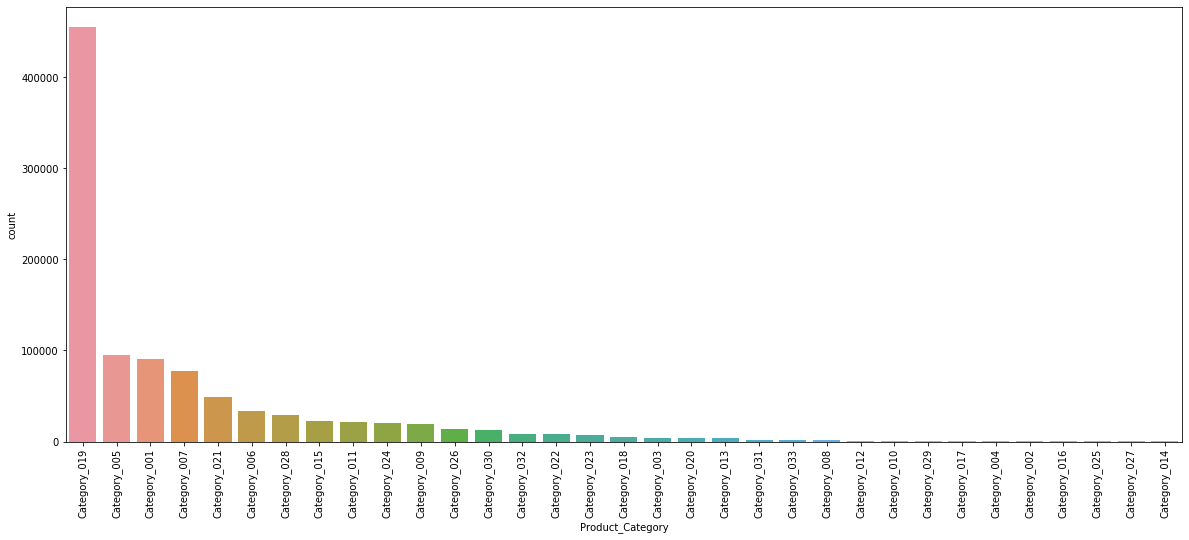

In [34]:
plt.figure(figsize=(20,8))
sns.countplot(x='Product_Category', 
              data=ts_df,
              order = ts_df['Product_Category'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

Category 19 is by far the most in demand product. We can see it really taper off, especially when the lifetime demand for an entire category over the span of approximately 6 years is less than 100. 

Intuitively I would recommend nixing these products. However, if they are extremely high profit products, they may be able to be justified, however that is a far stretch with such low demand over around 6 years, assuming the products have been there since the beginning. 

Another thing to consider is as these are value counts this is essentially all of the days the products were ordered. There could be different amounts of the product ordered each day, which is represented by 'Order Demand'. We'll take a look at that next.

In [35]:
# Lifetime demand of each product category

ts_df_cat = ts_df.groupby(by=ts_df.Product_Category).sum()
ts_df_cat = ts_df_cat.sort_values(by='Order_Demand', ascending=False)
ts_df_cat

,Order_Demand
Product_Category,
Category_019,4194378057
Category_006,392440975
Category_005,194334575
Category_007,127078780
Category_028,46854126
Category_033,42360000
Category_030,39961526
Category_032,4400792
Category_021,4286884


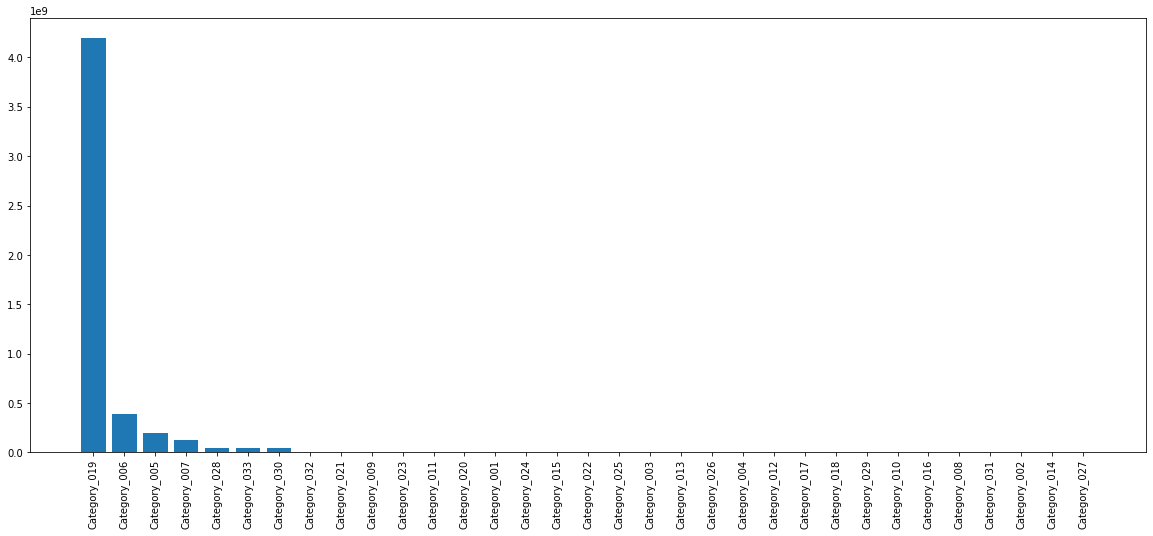

In [36]:
# Set variables and labels 

# x-labels
labels = ts_df_cat.index
# x-values
products = list(range(0,len(labels)))
# y-values
order_demand = ts_df_cat.Order_Demand

# Plot 
# Set figure
plt.figure(figsize=(20,8))
# Plot
plt.bar(products, order_demand, align='center')
# Add labels & rotate 90 degrees
plt.xticks(products, labels, rotation = 90)
plt.show()

In [46]:
ts_df.groupby

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-01,Product_2166,Whse_S,Category_024,2
2012-01-02,Product_0664,Whse_S,Category_011,20
2012-01-02,Product_1431,Whse_S,Category_019,20000
2012-01-02,Product_1631,Whse_S,Category_019,1000
2012-01-02,Product_1567,Whse_S,Category_019,68000
...,...,...,...,...
2016-12-30,Product_1513,Whse_A,Category_019,100
2016-12-30,Product_1431,Whse_S,Category_019,15000
2016-12-30,Product_1263,Whse_S,Category_019,15000


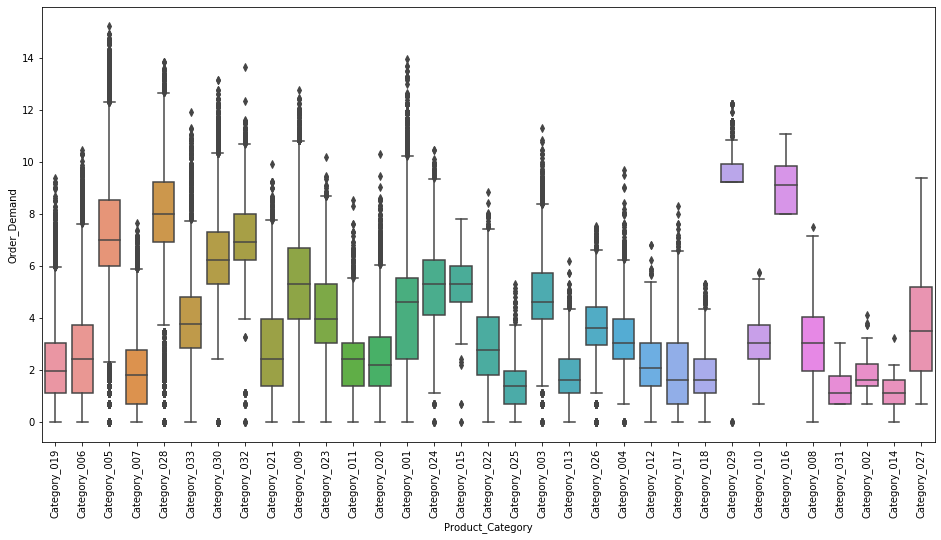

In [43]:
# Set figure size
plt.figure(figsize=(16,8))
# Box plot
sns.boxplot(ts_df['Product_Category'], np.log1p(ts_df['Order_Demand']))
plt.xticks(products, labels, rotation = 90)
plt.show()

# Modeling 

## Build & Fit Baseline Model

### Top Product

#### Daily Trend Forecasting

In [56]:
# Group by day
top_prod_d = ts_df.groupby(pd.Grouper(freq='D')).sum()
top_prod_d

,Order_Demand
Date,
2012-01-01,2
2012-01-02,680277
2012-01-03,1645257
2012-01-04,1295861
2012-01-05,8941774
...,...
2016-12-26,3515181
2016-12-27,1596831
2016-12-28,2701983


In [57]:
# Convert to fbprophet format

# Move datetime index to column
top_prod_d.reset_index(inplace=True)
# Rename columns for fbprophet format
top_prod_d = top_prod_d.rename(columns={'Date':'ds', 'Order_Demand': 'y'})
# Preview
top_prod_d.head()

,ds,y
0,2012-01-01,2
1,2012-01-02,680277
2,2012-01-03,1645257
3,2012-01-04,1295861
4,2012-01-05,8941774


In [58]:
m = Prophet(interval_width=0.95)
m.fit(top_prod_d)

# Forcasting 3 months into the future
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [59]:
forecast.head().round()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,2519380.0,-3071174.0,1415890.0,2519380.0,2519380.0,-3277236.0,-3277236.0,-3277236.0,-2513490.0,-2513490.0,-2513490.0,-763746.0,-763746.0,-763746.0,0.0,0.0,0.0,-757856.0
1,2012-01-02,2519828.0,857403.0,5631540.0,2519828.0,2519828.0,566411.0,566411.0,566411.0,1314837.0,1314837.0,1314837.0,-748426.0,-748426.0,-748426.0,0.0,0.0,0.0,3086240.0
2,2012-01-03,2520276.0,1277009.0,5287980.0,2520276.0,2520276.0,778002.0,778002.0,778002.0,1501006.0,1501006.0,1501006.0,-723003.0,-723003.0,-723003.0,0.0,0.0,0.0,3298279.0
3,2012-01-04,2520725.0,273849.0,4616534.0,2520725.0,2520725.0,-121541.0,-121541.0,-121541.0,566300.0,566300.0,566300.0,-687841.0,-687841.0,-687841.0,0.0,0.0,0.0,2399184.0
4,2012-01-05,2521173.0,576928.0,5114752.0,2521173.0,2521173.0,319826.0,319826.0,319826.0,963314.0,963314.0,963314.0,-643488.0,-643488.0,-643488.0,0.0,0.0,0.0,2840999.0


In [60]:
# Calculate RMSE
res = top_prod_d.y - forecast.yhat[:-365]
rss = np.sum(np.square(res))
mse = rss/len(res)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse.round()}")

RMSE: 1148398.0


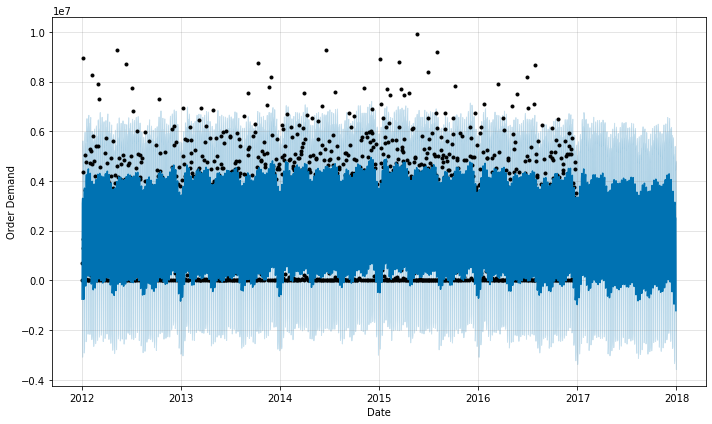

In [61]:
figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)

We can see there is a lot of daily variation here. The dark blue represents the daily prediction, while the black dot represents the actual value. The light blue represents the 80% confidence intervals (80% is defauly by fbprophet). 

We will smooth this out by looking at weekly and monthly demand. We'll do that in subsequent models. 

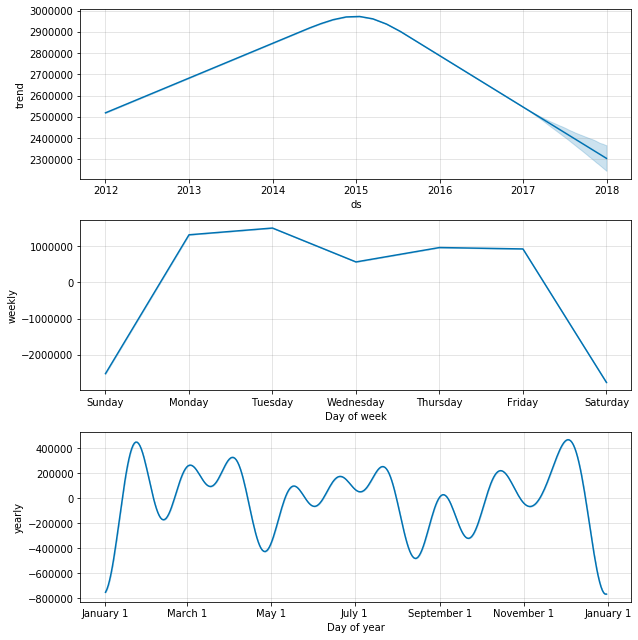

In [62]:
figure2 = m.plot_components(forecast)

### Discussion

**Trend**

We can see there is a trend present where demand for this product increased, peaking in 2015, before declining. 

Since we don't have more information on this dataset we can only guess what caused this. It could be that the product started out early in its lifecycle, peaked and then began to decline. 

It could be that a competitor product was introduced. It could be that there was a change in industry trends. Perhaps there was a promotional campaign in 2015. We would really need more information to decipher the cause of this trend. 

**Weekly**

We can see orders seem to have a M-F schedule, which makes sense as most businesses are closed on weekends.

There is a peak in demand Tuesday, with Monday being a close second. The lowest day for orders being Wednesday.

It does look like there is negative demand on the weekends. This was not explained in the dataset information on Kaggle, however this could represent return orders.

**Yearly**

It appears the highest peaks are in December and February. 

#### Monthly Trend Forecasting

In [63]:
# Group by month
top_prod_m = ts_df.groupby(pd.Grouper(freq='M')).sum()

# Preview
display(top_prod_m.head())
display(top_prod_m.tail())

,Order_Demand
Date,
2012-01-31,74098835
2012-02-29,86471824
2012-03-31,85524550
2012-04-30,74292489
2012-05-31,85943287


,Order_Demand
Date,
2016-08-31,77350826
2016-09-30,75081059
2016-10-31,81095613
2016-11-30,86892756
2016-12-31,77686878


,index,ds,y
0,0,2012-01-31,74098835
1,1,2012-02-29,86471824
2,2,2012-03-31,85524550
3,3,2012-04-30,74292489
4,4,2012-05-31,85943287


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-31,76299961.0,64890788.0,84729841.0,76299961.0,76299961.0,-1340319.0,-1340319.0,-1340319.0,-1340319.0,-1340319.0,-1340319.0,0.0,0.0,0.0,74959642.0
1,2012-02-29,76628389.0,64880961.0,83647690.0,76628389.0,76628389.0,-2012935.0,-2012935.0,-2012935.0,-2012935.0,-2012935.0,-2012935.0,0.0,0.0,0.0,74615455.0
2,2012-03-31,76979468.0,73659280.0,93210383.0,76979468.0,76979468.0,6667710.0,6667710.0,6667710.0,6667710.0,6667710.0,6667710.0,0.0,0.0,0.0,83647177.0
3,2012-04-30,77319221.0,65756196.0,84908580.0,77319221.0,77319221.0,-1487164.0,-1487164.0,-1487164.0,-1487164.0,-1487164.0,-1487164.0,0.0,0.0,0.0,75832056.0
4,2012-05-31,77670299.0,71698568.0,91384450.0,77670299.0,77670299.0,4148012.0,4148012.0,4148012.0,4148012.0,4148012.0,4148012.0,0.0,0.0,0.0,81818311.0


RMSE: 4998711.0


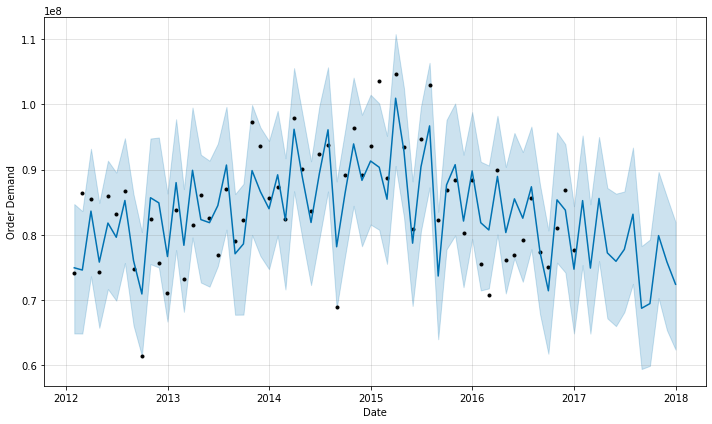

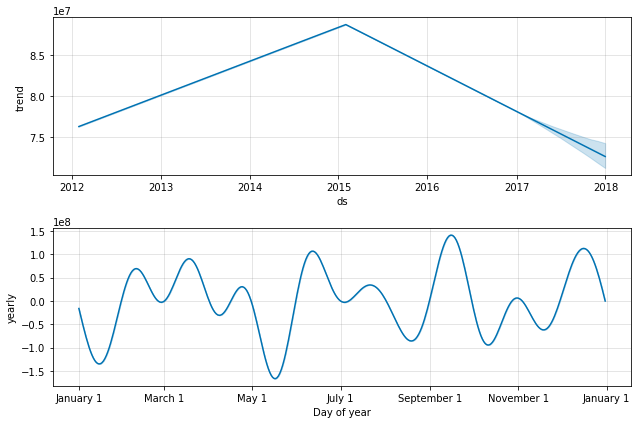

In [65]:
# Convert to fbprophet format

# Move datetime index to column
top_prod_m.reset_index(inplace=True)
# Rename columns for fbprophet format
top_prod_m = top_prod_m.rename(columns={'Date':'ds', 'Order_Demand': 'y'})
# Preview
display(top_prod_m.head())

m = Prophet(interval_width=0.95)
m.fit(top_prod_m)

# Forcasting 3 months into the future
future = m.make_future_dataframe(periods=12, freq='M')
forecast = m.predict(future)

display(forecast.head().round())

# Calculate RMSE
res = top_prod_m.y - forecast.yhat[:-12]
rss = np.sum(np.square(res))
mse = rss/len(res)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse.round()}")

figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)
figure2 = m.plot_components(forecast)

In our time series plot, we can see the trend unlike in our daily time series plot plot. One difference however is that the yearly trends don't line up with our daily time series components.

Let's see if weekly improves upon this.

#### Weekly Trend Forecasting

In [66]:
# Group by week
top_prod_w = ts_df.groupby(pd.Grouper(freq='W')).sum()

# Preview
display(top_prod_w.head())
display(top_prod_w.tail())

,Order_Demand
Date,
2012-01-01,2
2012-01-08,17909455
2012-01-15,16473029
2012-01-22,16400961
2012-01-29,13307777


,Order_Demand
Date,
2016-12-04,25454176
2016-12-11,20384795
2016-12-18,19351534
2016-12-25,17010128
2017-01-01,9011062


The first and last weeks have abnormally low numbers. We're going to remove these and assume they are incomplete since they are outliers compared to the rest of the dataset.

In [67]:
# Drop last row
top_prod_w = top_prod_w[:-1]

# Drop first row
top_prod_w = top_prod_w[1:]

# Preview
display(top_prod_w.head())
display(top_prod_w.tail())

,Order_Demand
Date,
2012-01-08,17909455
2012-01-15,16473029
2012-01-22,16400961
2012-01-29,13307777
2012-02-05,22334970


,Order_Demand
Date,
2016-11-27,18668617
2016-12-04,25454176
2016-12-11,20384795
2016-12-18,19351534
2016-12-25,17010128


Looks much better. Let's now continue on. 

In [68]:
# Convert to fbprophet format

# Move datetime index to column
top_prod_w.reset_index(inplace=True)
# Rename columns for fbprophet format
top_prod_w = top_prod_w.rename(columns={'Date':'ds', 'Order_Demand': 'y'})
# Preview
display(top_prod_w.head())
display(top_prod_w.tail())

,ds,y
0,2012-01-08,17909455
1,2012-01-15,16473029
2,2012-01-22,16400961
3,2012-01-29,13307777
4,2012-02-05,22334970


,ds,y
255,2016-11-27,18668617
256,2016-12-04,25454176
257,2016-12-11,20384795
258,2016-12-18,19351534
259,2016-12-25,17010128


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat,yhat_lower,yhat_upper
307,2017-11-26,17769568.0,19511337.0,12890722.0,25477268.0
308,2017-12-03,17750855.0,20626446.0,14314430.0,27038249.0
309,2017-12-10,17732142.0,20533003.0,14279401.0,27200884.0
310,2017-12-17,17713428.0,18635452.0,12312690.0,25700587.0
311,2017-12-24,17694715.0,15546492.0,9428497.0,22229078.0


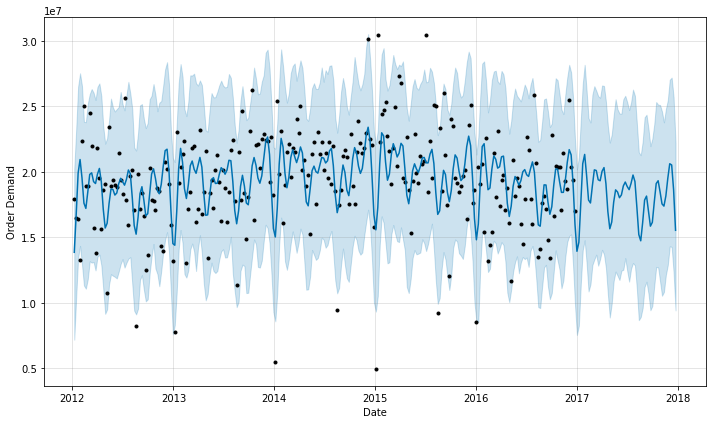

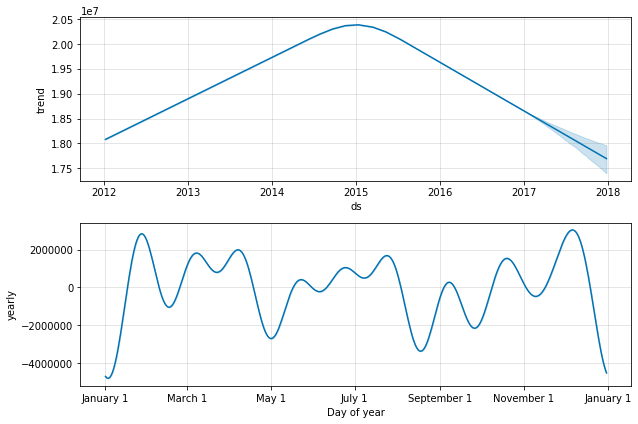

In [69]:
# Fit model & predict

m = Prophet(interval_width=0.95)
m.fit(top_prod_w)

# Forcasting 3 months into the future
future = m.make_future_dataframe(periods=52, freq='W')
forecast = m.predict(future)

display(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].tail().round())

figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)
figure2 = m.plot_components(forecast)

We can see the trend and yearly components here match the daily time series trends, while also still showing the overall trend. 

Next we'll want to take a look at performance metrics and test our model on other products.

## Performance Metrics

In [70]:
# Calculate RMSE
res = top_prod_w.y - forecast.yhat[:-52]
rss = np.sum(np.square(res))
mse = rss/len(res)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse.round()}")

RMSE: 3331543.0


### Crossvalidation

In [71]:
from fbprophet.diagnostics import cross_validation
top_prod_w_cv = cross_validation(m, initial='365 days', period='365 days', horizon = '365 days')
display(top_prod_w_cv.head())
display(top_prod_w_cv.tail())

INFO:fbprophet:Making 3 forecasts with cutoffs between 2013-12-26 00:00:00 and 2015-12-26 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-12-29,1.734900e+07,1.158973e+07,2.332154e+07,18249417,2013-12-26
1,2014-01-05,1.604270e+07,1.052470e+07,2.198561e+07,5480766,2013-12-26
2,2014-01-12,1.693469e+07,1.127833e+07,2.287294e+07,25416676,2013-12-26
3,2014-01-19,1.974185e+07,1.358547e+07,2.625374e+07,19840243,2013-12-26
4,2014-01-26,2.231600e+07,1.637313e+07,2.840018e+07,23104932,2013-12-26


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
152,2016-11-27,2.386726e+07,1.763929e+07,3.074420e+07,18668617,2015-12-26
153,2016-12-04,2.491217e+07,1.847205e+07,3.194496e+07,25454176,2015-12-26
154,2016-12-11,2.465636e+07,1.792788e+07,3.152426e+07,20384795,2015-12-26
155,2016-12-18,2.259261e+07,1.593365e+07,2.916042e+07,19351534,2015-12-26
156,2016-12-25,1.962039e+07,1.278010e+07,2.672804e+07,17010128,2015-12-26


In [72]:
from fbprophet.diagnostics import performance_metrics
top_prod_p = performance_metrics(top_prod_w_cv)
print('Min MAPE:')
display(top_prod_p.sort_values(by=['mape']).head())
print('Min RMSE:')
display(top_prod_p.sort_values(by=['rmse']).head())

Min MAPE:


,horizon,mse,rmse,mae,mape,coverage
129,332 days,8.215726e+12,2.866309e+06,2.435015e+06,0.124274,1.000000
138,353 days,1.334425e+13,3.652978e+06,2.572799e+06,0.124681,0.866667
60,171 days,8.485358e+12,2.912964e+06,2.363568e+06,0.126450,0.933333
137,352 days,1.354782e+13,3.680736e+06,2.657858e+06,0.128527,0.866667
84,227 days,1.157929e+13,3.402835e+06,2.580156e+06,0.130757,0.933333


Min RMSE:


,horizon,mse,rmse,mae,mape,coverage
129,332 days,8.215726e+12,2.866309e+06,2.435015e+06,0.124274,1.000000
60,171 days,8.485358e+12,2.912964e+06,2.363568e+06,0.126450,0.933333
130,337 days,9.461434e+12,3.075944e+06,2.589061e+06,0.133408,1.000000
59,170 days,9.687913e+12,3.112541e+06,2.633125e+06,0.144354,0.933333
42,129 days,9.968519e+12,3.157296e+06,2.709751e+06,0.136616,1.000000


The same min for both! 

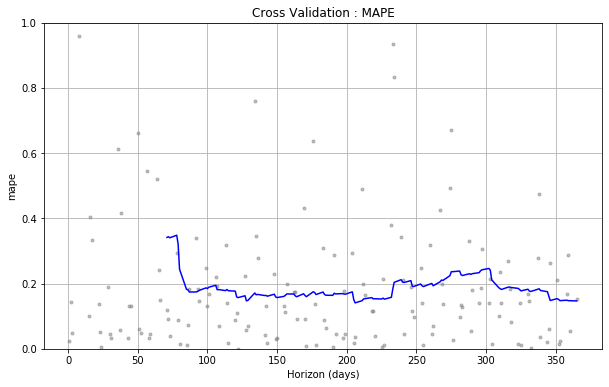

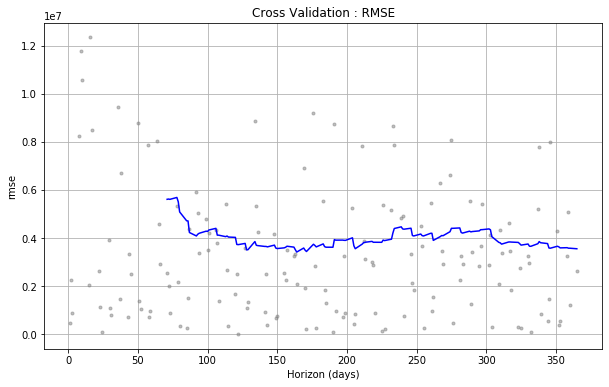

In [73]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(top_prod_w_cv, metric='mape', rolling_window=.2)
plt.title('Cross Validation : MAPE')
plt.ylim([0,1])
plt.show()
fig = plot_cross_validation_metric(top_prod_w_cv, metric='rmse', rolling_window=.2)
plt.title('Cross Validation : RMSE')
plt.show()

### Hyperparameter Tuning

In [74]:
import itertools
import numpy as np
import pandas as pd

# Filter warnings
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [3, 5, 10, 15],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(top_prod_w)  # Fit model with given params
    df_cv = cross_validation(m, horizon='365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale          rmse
0                     0.001                        3  4.964157e+06
1                     0.001                        5  4.962713e+06
2                     0.001                       10  4.963118e+06
3                     0.001                       15  4.962817e+06
4                     0.010                        3  4.910339e+06
5                     0.010                        5  4.835296e+06
6                     0.010                       10  4.905783e+06
7                     0.010                       15  4.739699e+06
8                     0.100                        3  4.905503e+06
9                     0.100                        5  4.905211e+06
10                    0.100                       10  4.897670e+06
11                    0.100                       15  4.900662e+06
12                    0.500                        3  4.240838e+06
13                    0.500                        5  4.240334

In [75]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 10}


None of these appear to improve the model. We can test them out however. 

,ds,trend,yhat,yhat_lower,yhat_upper
307,2017-11-26,16171936.0,18768623.0,12023012.0,25340838.0
308,2017-12-03,16149241.0,19923890.0,13267664.0,26357514.0
309,2017-12-10,16126545.0,19802645.0,13340215.0,25767453.0
310,2017-12-17,16103850.0,17813083.0,10976830.0,24753500.0
311,2017-12-24,16081154.0,14618890.0,8377108.0,20771982.0


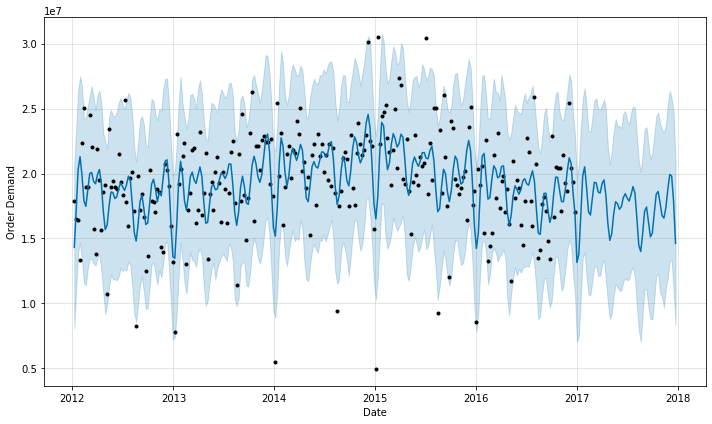

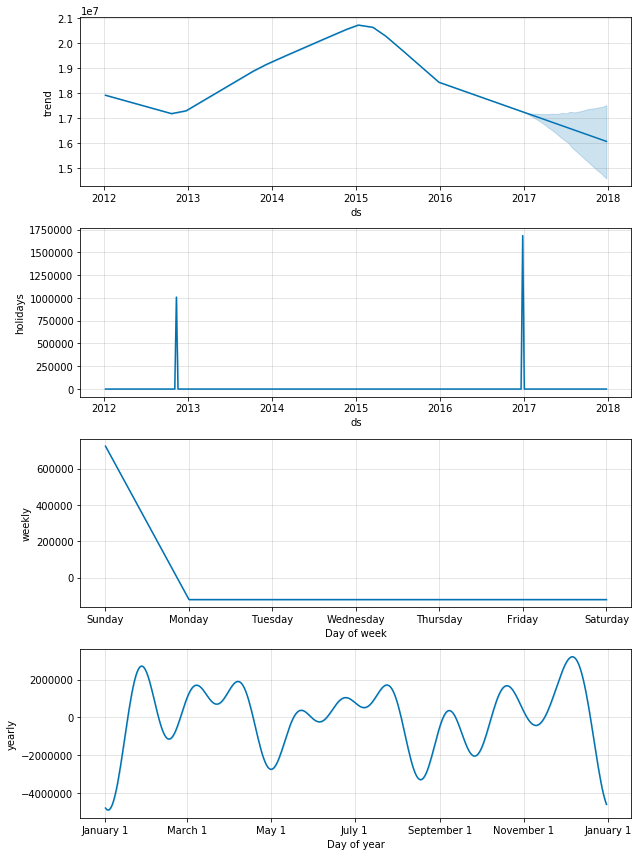

In [78]:
m = Prophet(interval_width = 0.95,
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            changepoint_prior_scale = 0.5,
            seasonality_prior_scale=10
            )
m.add_country_holidays(country_name='US')
m.fit(top_prod_w)

# Forcasting 3 months into the future
future = m.make_future_dataframe(periods=52, freq='W')
forecast = m.predict(future)

display(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].tail().round())

figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)
figure2 = m.plot_components(forecast)

In [79]:
# Calculate RMSE
res = top_prod_w.y - forecast.yhat[:-52]
rss = np.sum(np.square(res))
mse = rss/len(res)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse.round()}")

RMSE: 3248195.0


A little bit better. Lol. Let's try with daily.

,ds,trend,yhat,yhat_lower,yhat_upper
2186,2017-12-26,2479503.0,3435432.0,1167271.0,5697838.0
2187,2017-12-27,2479242.0,2463211.0,247196.0,4562834.0
2188,2017-12-28,2478982.0,2838836.0,630659.0,4996056.0
2189,2017-12-29,2478722.0,2771003.0,484027.0,4865567.0
2190,2017-12-30,2478462.0,-916244.0,-3171259.0,1264835.0


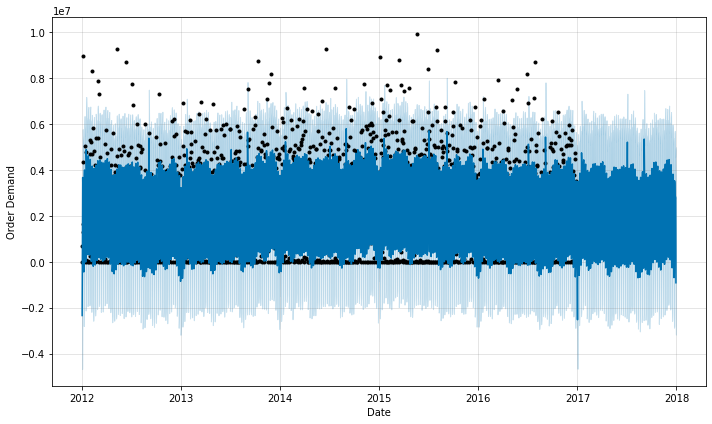

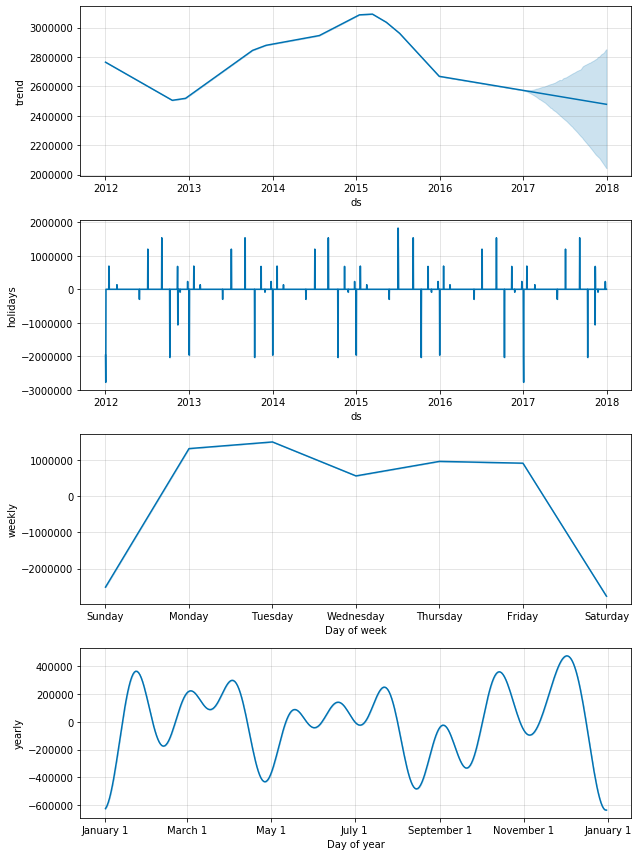

In [80]:
m = Prophet(interval_width = 0.95,
            yearly_seasonality = True,
            weekly_seasonality = True,
            daily_seasonality = False,
            changepoint_prior_scale = 0.5,
            seasonality_prior_scale=10
            )
m.add_country_holidays(country_name='US')
m.fit(top_prod_d)

# Forcasting 3 months into the future
future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

display(forecast[['ds', 'trend','yhat', 'yhat_lower', 'yhat_upper']].tail().round())

figure1 = m.plot(forecast, xlabel = 'Date', ylabel = 'Order Demand',uncertainty=True)
figure2 = m.plot_components(forecast)

In [81]:
# Calculate RMSE
res = top_prod_d.y - forecast.yhat[:-365]
rss = np.sum(np.square(res))
mse = rss/len(res)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse.round()}")

RMSE: 1126501.0


Daily by far gives the best accuracy. This is an improvement upon our daily baseline model as well. Let's look at crossvalidation for daily.

In [84]:
top_prod_p

,horizon,mse,rmse,mae,coverage
0,37 days,3.663372e+12,1.913994e+06,1.455144e+06,0.698630
1,38 days,3.713924e+12,1.927154e+06,1.455093e+06,0.695205
2,39 days,3.706697e+12,1.925279e+06,1.445916e+06,0.698630
3,40 days,3.725371e+12,1.930122e+06,1.453600e+06,0.691781
4,41 days,3.708368e+12,1.925712e+06,1.463247e+06,0.691781
...,...,...,...,...,...
324,361 days,3.785611e+12,1.945665e+06,1.452691e+06,0.715753
325,362 days,3.737413e+12,1.933239e+06,1.458774e+06,0.715753
326,363 days,3.841504e+12,1.959975e+06,1.483020e+06,0.705479
327,364 days,3.820638e+12,1.954645e+06,1.485745e+06,0.698630


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2013-01-01,8.193064e+05,-1.238815e+06,2.809720e+06,1627801,2012-12-31
1,2013-01-02,1.113702e+06,-8.398747e+05,2.961385e+06,4052847,2012-12-31
2,2013-01-03,1.593010e+06,-3.422466e+05,3.600366e+06,312249,2012-12-31
3,2013-01-04,8.644749e+05,-1.146833e+06,2.739502e+06,332258,2012-12-31
4,2013-01-05,-2.274170e+06,-4.427640e+06,-2.871810e+05,0,2012-12-31


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1455,2016-12-26,3.048597e+06,6.918484e+05,5.251926e+06,3515181,2015-12-31
1456,2016-12-27,3.352630e+06,1.124097e+06,5.606009e+06,1596831,2015-12-31
1457,2016-12-28,2.280971e+06,-8.195004e+04,4.454045e+06,2701983,2015-12-31
1458,2016-12-29,2.691578e+06,4.596793e+05,4.887105e+06,494117,2015-12-31
1459,2016-12-30,2.555023e+06,4.894194e+05,4.890458e+06,702950,2015-12-31


Min MAE:


,horizon,mse,rmse,mae,coverage
42,79 days,2.421572e+12,1.556140e+06,1.075344e+06,0.839041
43,80 days,2.435092e+12,1.560478e+06,1.080647e+06,0.839041
34,71 days,2.280133e+12,1.510011e+06,1.096601e+06,0.818493
141,178 days,2.316181e+12,1.521900e+06,1.101625e+06,0.825342
32,69 days,2.267481e+12,1.505816e+06,1.102496e+06,0.818493


Min RMSE:


,horizon,mse,rmse,mae,coverage
32,69 days,2.267481e+12,1.505816e+06,1.102496e+06,0.818493
34,71 days,2.280133e+12,1.510011e+06,1.096601e+06,0.818493
33,70 days,2.287402e+12,1.512416e+06,1.108976e+06,0.818493
141,178 days,2.316181e+12,1.521900e+06,1.101625e+06,0.825342
140,177 days,2.327779e+12,1.525706e+06,1.112480e+06,0.825342


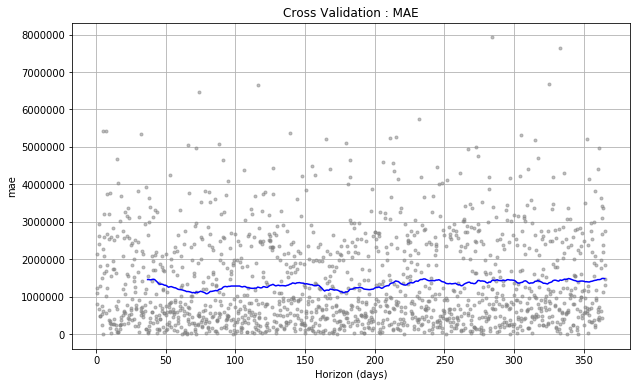

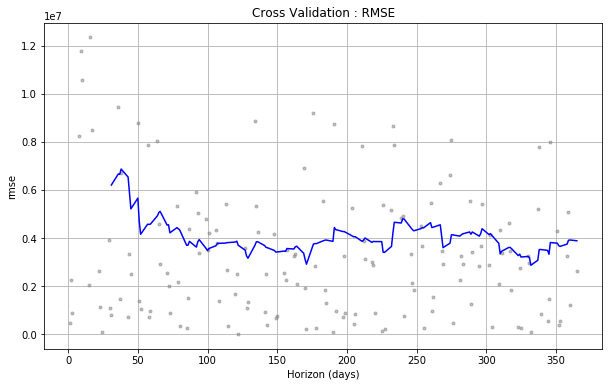

In [86]:
top_prod_d_cv = cross_validation(m, initial='365 days', period='365 days', horizon = '365 days')
display(top_prod_d_cv.head())
display(top_prod_d_cv.tail())

top_prod_p = performance_metrics(top_prod_d_cv)
print('Min MAE:')
display(top_prod_p.sort_values(by=['mae']).head())
print('Min RMSE:')
display(top_prod_p.sort_values(by=['rmse']).head())

fig = plot_cross_validation_metric(top_prod_d_cv, metric='mae')#, rolling_window=.2)
plt.title('Cross Validation : MAE')
#plt.ylim([0,1])
plt.show()
fig = plot_cross_validation_metric(top_prod_w_cv, metric='rmse')#, rolling_window=.2)
plt.title('Cross Validation : RMSE')
plt.show()

## Forecasting & Predictions

## Discussion

# Conclusion

## Results

## Recommendations

## Future Work